

---

## Web scraping and analysis

In [ ]:
#imports

import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
#create an empty list to collect all reviews
reviews =[]

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [ ]:
for i in range(1,36):
  page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}//?sortby=post_date%3ADesc&pagesize={100}")

  soup = BeautifulSoup(page.content, "html5")

  for item in soup.find_all("div", class_="text_content"):
    reviews.append(item.text)

  for item in soup.find_all("div", class_= "rating-10"):
    try:
      stars.append(item.span.text)
    except:
      print(f"Error on page {i}")
      stars.append("None")

  #date
  for item in soup.find_all("time"):
    date.append(item.text)

  #country
  for item in soup.find_all("h3"):
    country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 31
Error on page 32
Error on page 32
Error on page 35
Error on page 35


In [ ]:
#check the length of total reviews extracted
reviews= reviews[:3418]
len(reviews)

3418

In [ ]:
country = country[:3418]
len(country)

3418

In [ ]:
date = date[:3418]
len(date)

3418

In [ ]:
#check the length
stars = stars[:3418]

In [ ]:
#create a dataframe from these collected lists of data

df = pd.DataFrame({"reviews":reviews, "stars":stars, "date":date, "country": country})

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Good domestic flight operat...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th August 2023,United Kingdom
1,Not Verified | Failed at all basic travel fund...,10,8th August 2023,Canada
2,✅ Trip Verified | They lost my baggage in a v...,1,8th August 2023,Poland
3,✅ Trip Verified | Late boarding led to a one ...,1,5th August 2023,United Kingdom
4,✅ Trip Verified | As usual the flight is delay...,1,4th August 2023,United Kingdom


In [ ]:
df.shape

(3418, 4)

Export the data into a csv format

In [ ]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews.csv")

Data Cleaning

In [ ]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

In [ ]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd + "/BA_reviews.csv", index_col=0)

In [ ]:
df.head()

,reviews,stars,date,country
0,✅ Trip Verified | Good domestic flight operat...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th August 2023,United Kingdom
1,Not Verified | Failed at all basic travel fund...,10,8th August 2023,Canada
2,✅ Trip Verified | They lost my baggage in a v...,1,8th August 2023,Poland
3,✅ Trip Verified | Late boarding led to a one ...,1,5th August 2023,United Kingdom
4,✅ Trip Verified | As usual the flight is delay...,1,4th August 2023,United Kingdom


We will also create a column which mentions if the user is verified or not

In [ ]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [ ]:
df['verified']

0        True
1       False
2        True
3        True
4        True
        ...  
3413    False
3414    False
3415    False
3416    False
3417    False
Name: verified, Length: 3418, dtype: bool

Cleaning reviews

We will extract the column of reviews into a separate dataframe and clean it for semantic analysis

In [ ]:
#for lemantization of words we will use nltk library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

#creatw an empty list to collect cleaned data corpus
corpus = []

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
  rev = re.sub('[^a-zA-Z]',' ',rev)
  rev = rev.lower()
  rev = rev.split()
  rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
  rev = " ".join(rev)
  corpus.append(rev)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#add the corpus to the original dataframe

df['corpus'] = corpus

In [ ]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Good domestic flight operat...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,8th August 2023,United Kingdom,True,good domestic flight operated ba cityflyer gro...
1,Not Verified | Failed at all basic travel fund...,10,8th August 2023,Canada,False,verified failed basic travel fundamental fligh...
2,✅ Trip Verified | They lost my baggage in a v...,1,8th August 2023,Poland,True,hey lost baggage simple situation three week c...
3,✅ Trip Verified | Late boarding led to a one ...,1,5th August 2023,United Kingdom,True,late boarding led one hour flight leaving two ...
4,✅ Trip Verified | As usual the flight is delay...,1,4th August 2023,United Kingdom,True,usual flight delayed ba try blame someone inab...


Cleaning/Format date

In [ ]:
df.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [ ]:
#convert the date to datettime formst

df.date = pd.to_datetime(df.date)

In [ ]:
df.date.head()

0   2023-08-08
1   2023-08-08
2   2023-08-08
3   2023-08-05
4   2023-08-04
Name: date, dtype: datetime64[ns]

Cleaning ratings with stars

In [ ]:
df.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '10', '1', '9', '6', '2', '4',
       '8', '3', '7', '5', 'None'], dtype=object)

In [ ]:
df.stars =  df.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")

In [ ]:
df.stars.value_counts()

1       798
2       398
3       386
8       332
10      289
9       284
7       277
5       246
4       234
6       171
None      3
Name: stars, dtype: int64

In [ ]:
df.drop(df[df.stars == "None"].index, axis=0, inplace = True)

In [ ]:
df.stars.unique()

array(['5', '10', '1', '9', '6', '2', '4', '8', '3', '7'], dtype=object)

Check for null Values

In [ ]:
df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3413
                       True     False     False        2
dtype: int64

In [ ]:
df.country.isnull().value_counts()

False    3413
True        2
Name: country, dtype: int64

In [ ]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace = True)

In [ ]:
df.shape

(3413, 6)

In [ ]:
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | Good domestic flight operat...,5,2023-08-08,United Kingdom,True,good domestic flight operated ba cityflyer gro...
1,Not Verified | Failed at all basic travel fund...,10,2023-08-08,Canada,False,verified failed basic travel fundamental fligh...
2,✅ Trip Verified | They lost my baggage in a v...,1,2023-08-08,Poland,True,hey lost baggage simple situation three week c...
3,✅ Trip Verified | Late boarding led to a one ...,1,2023-08-05,United Kingdom,True,late boarding led one hour flight leaving two ...
4,✅ Trip Verified | As usual the flight is delay...,1,2023-08-04,United Kingdom,True,usual flight delayed ba try blame someone inab...
...,...,...,...,...,...,...
3408,BA25 Aug 8th LHR-HKK. Club World. Upper deck. ...,9,2014-08-13,United Kingdom,False,ba aug th lhr hkk club world upper deck overal...
3409,June 25th 2014. My wife and daughter boarded i...,3,2014-08-13,United States,False,june th wife daughter boarded boston door clos...
3410,Flew Sydney - Singapore - London return. Thoro...,7,2014-08-13,Australia,False,flew sydney singapore london return thoroughly...
3411,LHR - Houston - LHR. Two of us travelled using...,6,2014-08-13,United Kingdom,False,lhr houston lhr two u travelled using avios am...


In [ ]:
# export the cleaned data

df.to_csv(cwd + "/cleaned-BA-reviews.csv")

Exploratory Data Analysis

In [ ]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt



In [ ]:
!pip3 install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
cwd = os.getcwd()

df = pd.read_csv(cwd + "/cleaned-BA-reviews.csv", index_col=0)
df = df.reset_index(drop=True)

In [ ]:
df.tail()

,reviews,stars,date,country,verified,corpus
3408,BA25 Aug 8th LHR-HKK. Club World. Upper deck. ...,9,2014-08-13,United Kingdom,False,ba aug th lhr hkk club world upper deck overal...
3409,June 25th 2014. My wife and daughter boarded i...,3,2014-08-13,United States,False,june th wife daughter boarded boston door clos...
3410,Flew Sydney - Singapore - London return. Thoro...,7,2014-08-13,Australia,False,flew sydney singapore london return thoroughly...
3411,LHR - Houston - LHR. Two of us travelled using...,6,2014-08-13,United Kingdom,False,lhr houston lhr two u travelled using avios am...
3412,Travelled LHR-YYZ BA97 on 9 July returning BA9...,6,2014-08-11,United Kingdom,False,avelled lhr yyz ba july returning ba july chec...


In [ ]:
df.stars.mean()

4.681511866393202

Text(0.5, 0.98, 'Counts for each ratings')

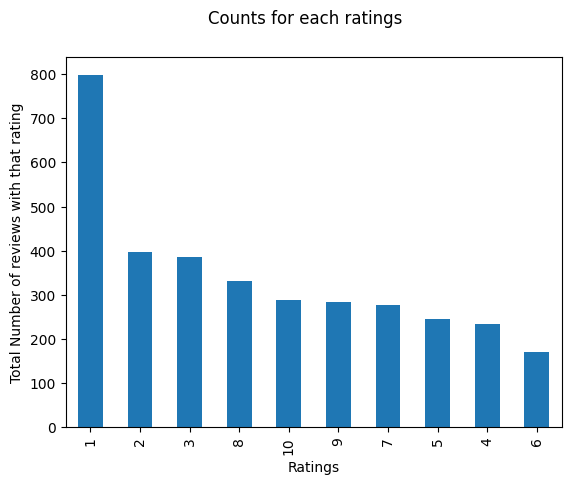

In [ ]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [ ]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [ ]:
#resetting index as we do not want to confuse between the index and the rating values
df_ratings = df_ratings.reset_index()

In [ ]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [ ]:
df_ratings

,Stars,total_counts,pct_values
0,1,798,23.38
1,2,398,11.66
2,3,385,11.28
3,8,332,9.73
4,10,289,8.47
5,9,284,8.32
6,7,277,8.12
7,5,246,7.21
8,4,233,6.83
9,6,171,5.01


Text(0.5, 1.0, 'Counts for each ratings')

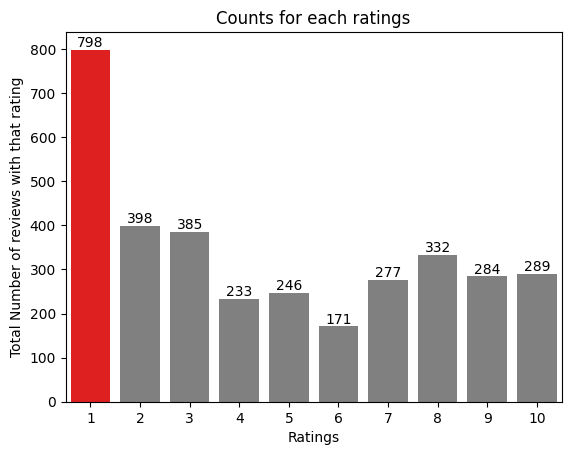

In [ ]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.Stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])

ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [ ]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

69 unique countries


Which country most review comes from?

In [ ]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [ ]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

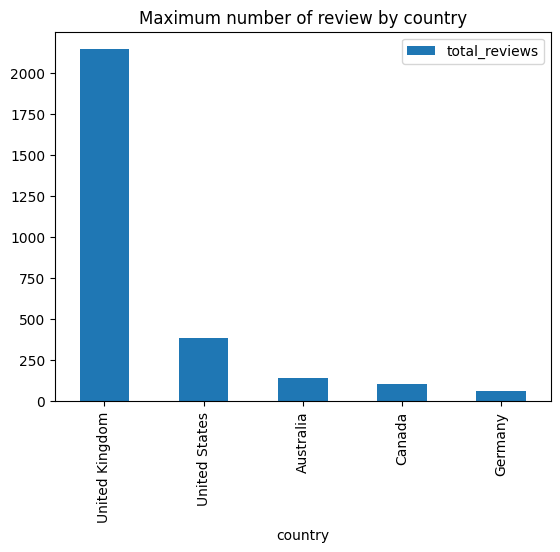

In [ ]:
df_country_review.plot(kind="bar", x='country')
plt.title("Maximum number of review by country")

In [ ]:
df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

<ipython-input-177-d2bd358aa525>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

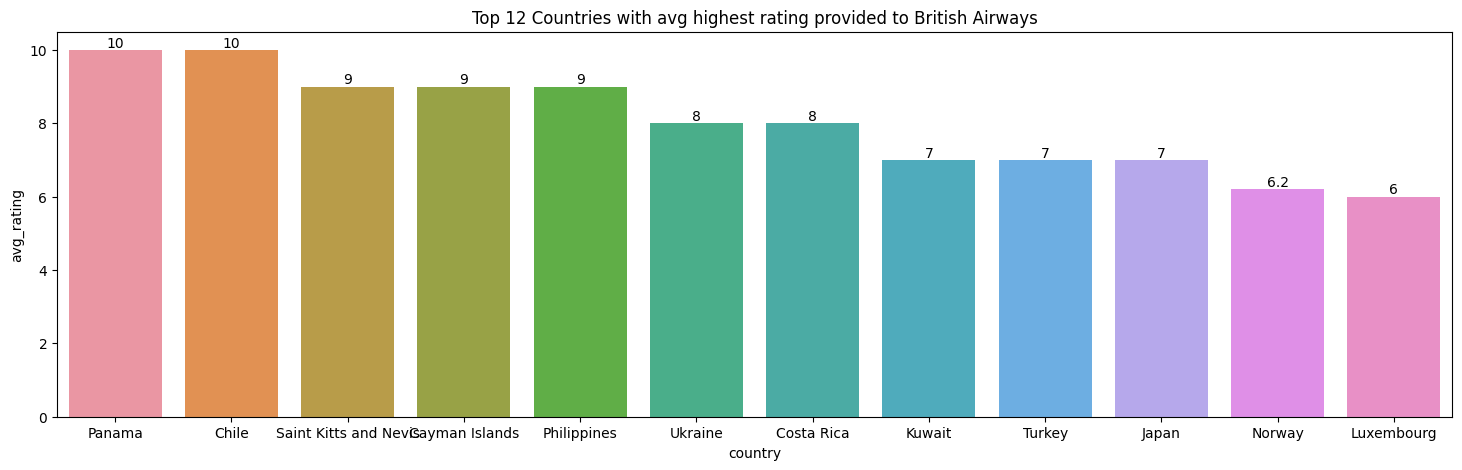

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

Time Series Analysis

In [ ]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)


In [ ]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

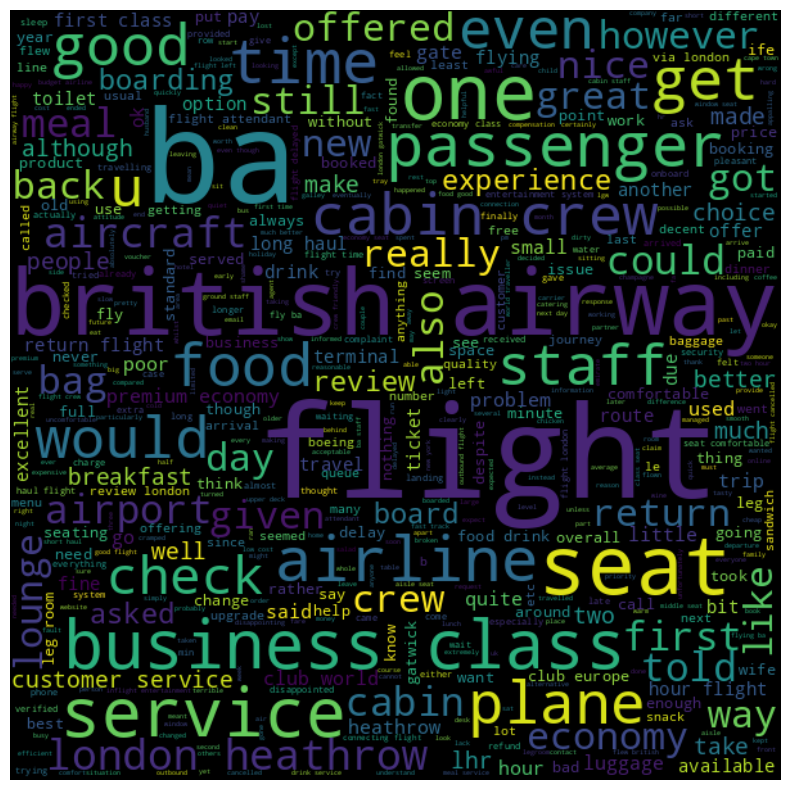

In [ ]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()